# Histone Citation Data : Calculating Co-Citation Frequencies
***
## Introduction
The aim of this assignment is to calculate co-citation frequencies of all cited papers that were obtained after matching PubMed journal articles data for the search term 'histones' from for the years 1980 to 1990 (both inclusive) with open_citations data as found in Valhalla.<br>
<br>
The resulting csv file containing 'citing' and 'cited' information has been used as a starting point for this assignment. The following are some key features of this input file:<br>
    1. Total of rows: 87,332 (each row represents a 'citing' - 'cited' pair)<br>
    2. Total number of unique citing papers: 5,008<br>
    3. Total number of unique cited papers: 33,566<br>
    4. There are 5 columns : 'n', 'pmid', pub_year', 'doi', 'cited'<br>

### Import Libraries


In [17]:
import pandas as pd
from itertools import combinations
import csv
import sys
import matplotlib.pyplot as plt

In [2]:
#this code cell will read the csv file that contains 'citing' and 'cited' information
df1 = pd.read_csv('/Users/sidahuja/Dev/HistoneCitation/HistoneCiteCode/pubmed-oc-data.csv')

### Create 'cited' lists for each citation

The dataframe from the last step will need to be processed such that each row contains a list of 'cited' papers for every 'citing' paper.<br>
The 'groupby' function in Pandas will be used to accomplish this. Since 'groupby' needs strings to carry out the grouping of 'cited' cells, the 'NaN' values (which is inherently a float value) will need to be replaced by ' ' (empty string). apply(list) method will then convert the result of cited grouping into lists. 

In [8]:
df2 = df1.fillna('')
df3 = df2.groupby(['doi'])['cited'].apply(list)

In [9]:
#convert df3 from 'series' type to dataframe by using reset_index()
df4 = df3.reset_index()

### Main analysis

At this stage, initiate an empty dictionary. This dictionary will evenutally store the (key, value) pairs for which 'key' will co-citation pairs, and 'value' will
be the co-citation frequency of the corresponding pair.

In [10]:
cited_dict = {}

The following code cell describes the process of creating 'key-value' pairs in the dictionary. 

In [11]:
#iterate through values of the cited column. each value is a list of cited papers for a particular citation. Ignore empty lists.
for values in df4['cited']:
    if values != ['']:
        for elements in list(combinations(values, 2)):             #elements will be each tuple containing a pair of co-cited papers.
            elements = tuple(sorted(elements))                      #sort the tuple so that tuple(B, A) will be counted as tuple(A, B)
            if elements in cited_dict:
                cited_dict[elements] += 1
            else:
                cited_dict[elements] = 1                      

### Pandas Dataframe from Dictionary

Review the dictionary. 

Create a pandas dataframe for the dictionary, and sort the dataframe by co-citation frequency. 

In [12]:
co_cited_df = pd.DataFrame(cited_dict.items(), columns=['co-cited pairs', 'co-citation freq'])
co_cited_df.sort_values(by=['co-citation freq'], inplace=True, ascending=False)

Print first few lines of the dataframe, to check for accuracy. 

In [51]:
print(co_cited_df.head(10))
co_cited_df.info

                                          co-cited pairs  co-citation freq
16495  (10.1016/s0021-9258(19)52451-6, 10.1038/227680a0)               155
27137   (10.1016/0003-9861(69)90042-3, 10.1038/227680a0)               117
50781   (10.1016/0003-2697(76)90527-3, 10.1038/227680a0)                73
13778  (10.1038/227680a0, 10.1146/annurev.bi.49.07018...                70
13768           (10.1038/227680a0, 10.1083/jcb.83.2.403)                64
12552  (10.1038/271115a0, 10.1146/annurev.bi.46.07017...                64
77481  (10.1016/0003-9861(69)90042-3, 10.1016/s0021-9...                60
6403   (10.1146/annurev.bi.48.070179.001111, 10.1146/...                59
16450  (10.1016/s0021-9258(19)52451-6, 10.1042/bj0620...                59
27149  (10.1038/227680a0, 10.1146/annurev.bi.48.07017...                55


<bound method DataFrame.info of                                             co-cited pairs  co-citation freq
16495    (10.1016/s0021-9258(19)52451-6, 10.1038/227680a0)               155
27137     (10.1016/0003-9861(69)90042-3, 10.1038/227680a0)               117
50781     (10.1016/0003-2697(76)90527-3, 10.1038/227680a0)                73
13778    (10.1038/227680a0, 10.1146/annurev.bi.49.07018...                70
13768             (10.1038/227680a0, 10.1083/jcb.83.2.403)                64
...                                                    ...               ...
799955   (10.1016/s0021-9258(17)39395-x, 10.1016/s0021-...                 1
799954   (10.1016/s0021-9258(18)33268-x, 10.1016/s0021-...                 1
799953   (10.1016/s0021-9258(18)33268-x, 10.1016/s0021-...                 1
799952   (10.1016/s0021-9258(18)33268-x, 10.1016/s0021-...                 1
2171930  (10.1016/s0021-9258(17)40146-3, 10.1016/s0021-...                 1

[2171931 rows x 2 columns]>

### Counting co-cited pairs

Now count the number of co-cited pairs for each frequency. This is done using the 'count' function. 

In [14]:
co_cited_pair_freq_df = co_cited_df.groupby(['co-citation freq'], as_index=False)['co-cited pairs'].count()
print(co_cited_pair_freq_df)

    co-citation freq  co-cited pairs
0                  1         1986639
1                  2          130054
2                  3           30775
3                  4           11498
4                  5            5299
5                  6            2750
6                  7            1620
7                  8            1005
8                  9             656
9                 10             408
10                11             308
11                12             199
12                13             172
13                14             117
14                15              77
15                16              67
16                17              44
17                18              32
18                19              28
19                20              19
20                21              19
21                22              21
22                23              18
23                24              18
24                25              10
25                26               4
2

### Plotting graph for co-cited pairs and co-cited frequencies

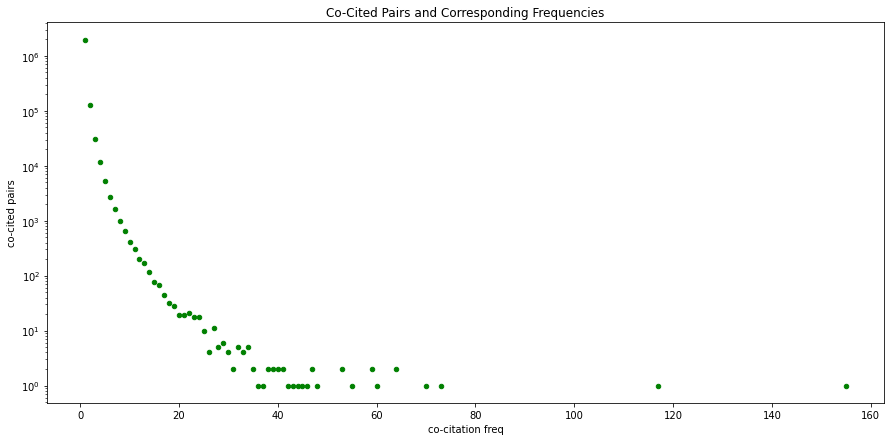

In [50]:
co_cited_plot = co_cited_pair_freq_df.plot.scatter(x='co-citation freq', y='co-cited pairs', marker='o', color='green', s=20)
plt.title('Co-Cited Pairs and Corresponding Frequencies')
plt.rcParams["figure.figsize"] = (15, 7)
plt.yscale('log')
plt.savefig('co-citation-freq.png')


## Conclusions

As seen in the graph above, there exists a logarithmic type relationship between 'co-cited pairs' and 'co-citation frequeny'. This finding matches the anticipated outcomes as very few papers have high co-citation frequency. In fact, out of the total 2,171,931 possible co-cited pairs, only 12 pairs have co-citation frquencies of more than 50. In fact, 1,986,639 co-cited pairs occur only once (in the citing paper). <br>

The most co-cited pair in the analysis was:<br>

***(10.1016/s0021-9258(19)52451-6, 10.1038/227680a0)*** <br>

where, <br>
<br>
10.1016/s0021-9258(19)52451-6: "Protein Measurement with Folin-Phenol Reagent" (Journal Article published Nov 1951 in Journal of Biological Chemistry volume 193 issue 1 on pages 265 to 275) <br>
10.1038/227680a0: "Cleavage of Structural Proteins during the Assembly of the Head of Bacteriophage T4" (Journal Article published Aug 1970 in Nature volume 227 issue 5259 on pages 680 to 685).<br> 
<br>
As to why these two particular papers have been co-cited the most is a topic best to be discussed with a biologist. From my first glance however it looks like both papers talk about proteins - one talks about measurement and another focusses on the 'cleavage' of structural proteins. 
<br>








